In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the data
item_info = pd.read_csv("../data/item_info.csv")
transactions_info = pd.read_csv("../data/transactions_info.csv")

In [9]:
item_info.head()

,item_code,item_sub_segment,item_segment,item_category,item_sub_department,item_department
0,379231.0,Powders,Chilies,Spices,Seasoning & Coconut Cream,Grocery
1,1107457.0,Packets,Dehydrated Fruits,Dried Fruit,Processed/Preserved Fruits,Grocery
2,363130.0,Mixes,Paste Mixes,Pastes,Seasoning & Coconut Cream,Grocery
3,526192.0,Mixes,Paste Mixes,Pastes,Seasoning & Coconut Cream,Grocery
4,1112425.0,Small Packs,Savory Biscuit Packs,Savory Biscuits Regular,Biscuits,Grocery


In [10]:
transactions_info.head()

,item_code,invoice_num,invoice_time,item_qty
0,1080988,4989509,2022-03-11T09:37:02.000Z,1.0
1,505825,4989509,2022-03-11T09:36:54.000Z,1.0
2,505825,2124807,2022-03-11T09:11:50.000Z,1.0
3,898,2124807,2022-03-11T09:11:53.000Z,1.0
4,129022,2125158,2022-03-11T22:36:00.000Z,1.0


In [11]:
item_info.describe()

,item_code
count,5.368400e+04
mean,5.992792e+05
std,6.069427e+05
min,3.400000e+01
25%,1.309548e+05
50%,6.013150e+05
75%,9.828452e+05
max,8.991880e+06


In [12]:
transactions_info.describe()

,item_code,item_qty
count,3.523510e+05,352351.000000
mean,6.241634e+05,1.572737
std,4.444372e+05,2.702548
min,8.800000e+01,0.022000
25%,1.266550e+05,1.000000
50%,8.532790e+05,1.000000
75%,1.055617e+06,1.046000
max,2.000023e+06,400.000000


In [13]:
# Merge the datasets on 'item_code'
merged_data = pd.merge(transactions_info, item_info, on='item_code')


In [14]:
merged_data.head(20)

,item_code,invoice_num,invoice_time,item_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department
0,1080988,4989509,2022-03-11T09:37:02.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
1,1080988,2125081,2022-03-11T18:56:29.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
2,1080988,9370252,2022-03-11T18:21:58.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
3,1080988,Z003000,2022-03-11T13:41:34.000Z,4.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
4,1080988,5830278,2022-03-11T19:11:50.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
5,1080988,4989701,2022-03-11T18:04:13.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
6,1080988,4989701,2022-03-11T18:04:47.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
7,1080988,2125085,2022-03-11T19:06:09.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
8,1080988,4989707,2022-03-11T18:13:03.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
9,1080988,6938151,2022-03-11T19:16:05.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery


In [39]:
# Filter data for Dry department, excluding Liquor, Tobacco, and Miscellaneous
dry_data = merged_data[
    (merged_data['item_department'] == 'Grocery') & 
    (~merged_data['item_category'].isin(['Liquor', 'Tobacco', 'Miscellaneous']))
]


In [40]:
print(dry_data.isnull().sum())


item_code              0
invoice_num            0
invoice_time           0
item_qty               0
item_sub_segment       0
item_segment           0
item_category          0
item_sub_department    0
item_department        0
dtype: int64


In [42]:
dry_data.head()

,item_code,invoice_num,invoice_time,item_qty,item_sub_segment,item_segment,item_category,item_sub_department,item_department
0,1080988,4989509,2022-03-11T09:37:02.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
1,1080988,2125081,2022-03-11T18:56:29.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
2,1080988,9370252,2022-03-11T18:21:58.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
3,1080988,Z003000,2022-03-11T13:41:34.000Z,4.0,Packets,Hen Eggs,Eggs,Eggs,Grocery
4,1080988,5830278,2022-03-11T19:11:50.000Z,1.0,Packets,Hen Eggs,Eggs,Eggs,Grocery


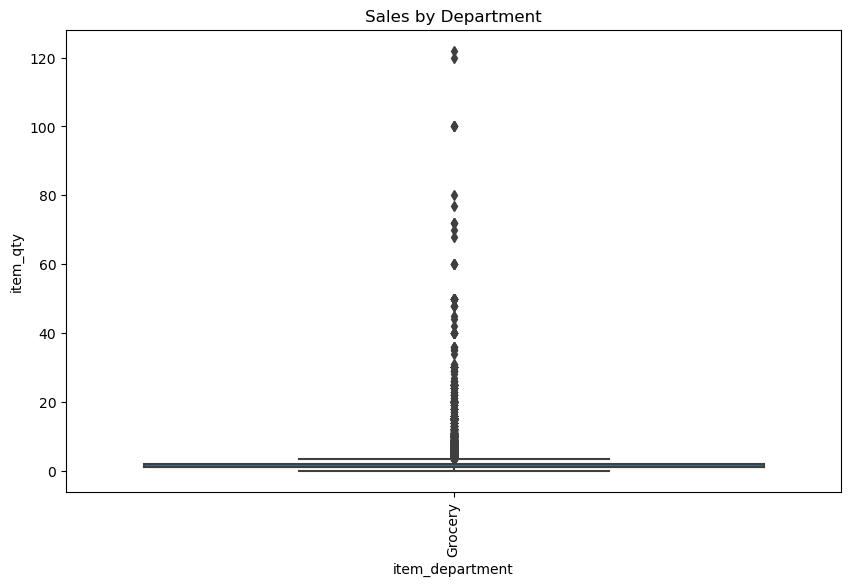

In [43]:
# Hypothesis 1: Sales by Department
plt.figure(figsize=(10, 6))
sns.boxplot(x='item_department', y='item_qty', data=dry_data)
plt.title("Sales by Department")
plt.xticks(rotation=90)
plt.show()

In [60]:
# Hypothesis 2: Sales by Time of Day
dry_data = dry_data.copy()  # Create a copy of the DataFrame
dry_data['invoice_time'] = pd.to_datetime(dry_data['invoice_time'])
dry_data['hour'] = dry_data['invoice_time'].dt.hour


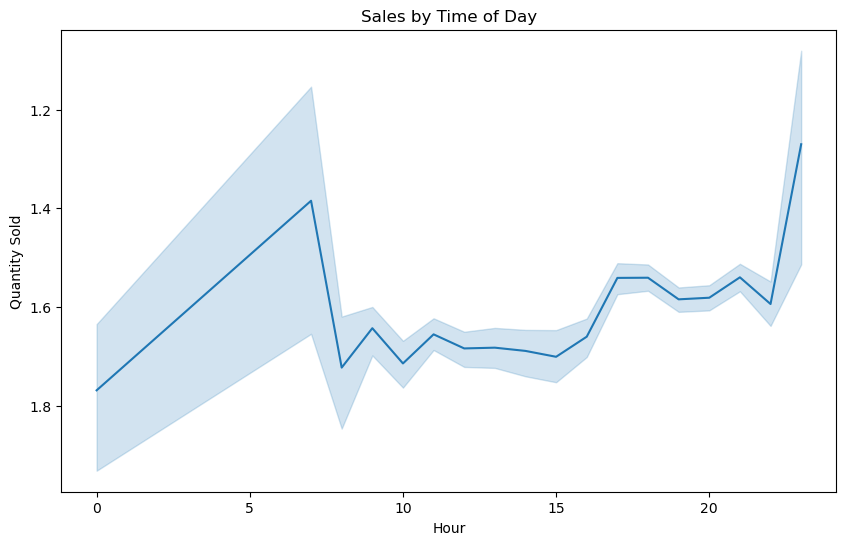

In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='item_qty', data=dry_data)
plt.title("Sales by Time of Day")
plt.xlabel("Hour")
plt.ylabel("Quantity Sold")
plt.show()


In [62]:
# Hypothesis 3: Top 25 Fast-Moving Items
top_items = dry_data.groupby('item_code')['item_qty'].sum().reset_index()
top_items = top_items.sort_values(by='item_qty', ascending=False).head(25)


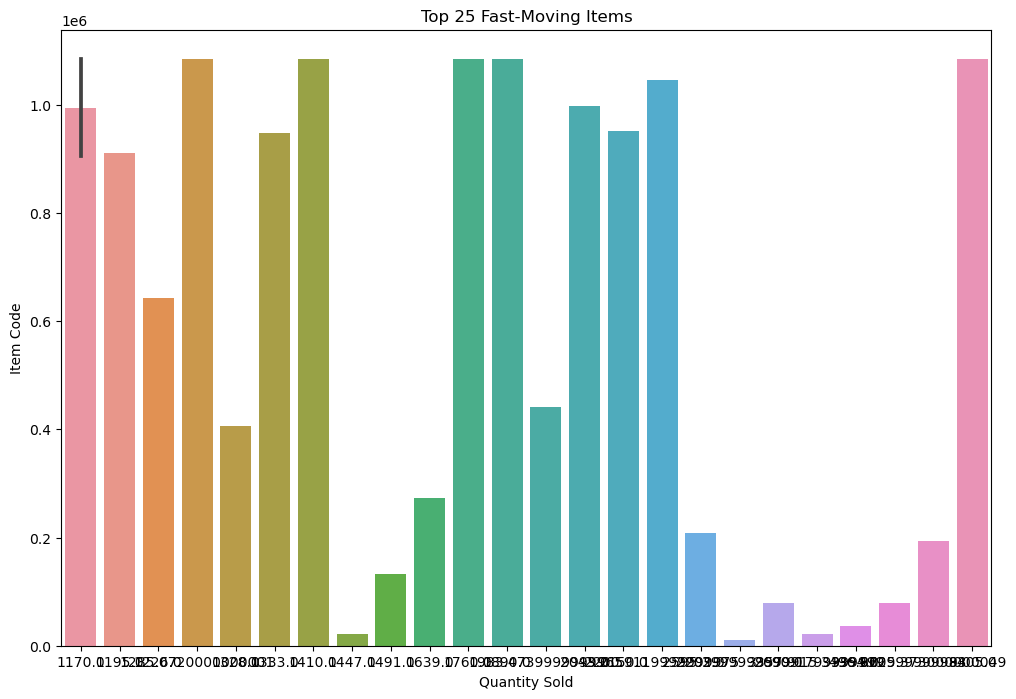

In [63]:

plt.figure(figsize=(12, 8))
sns.barplot(x='item_qty', y='item_code', data=top_items)
plt.title("Top 25 Fast-Moving Items")
plt.xlabel("Quantity Sold")
plt.ylabel("Item Code")
plt.show()


In [64]:
print(dry_data.describe())

                hour
count  151608.000000
mean       15.456651
std         4.031338
min         0.000000
25%        12.000000
50%        16.000000
75%        19.000000
max        23.000000


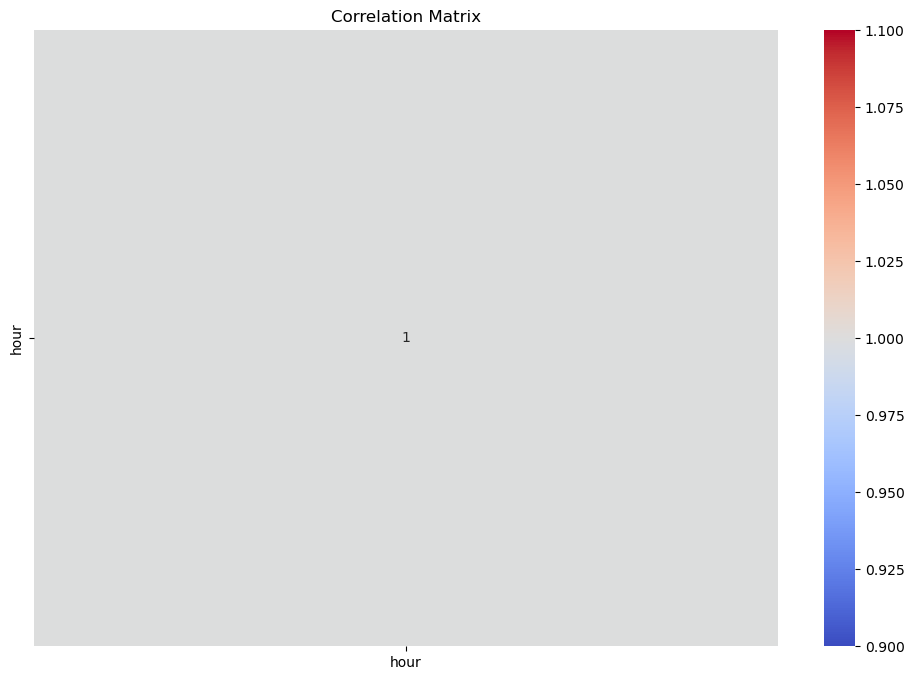

In [66]:
# Correlation Analysis
correlation_matrix = dry_data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [77]:
import statsmodels.api as sm

# Assuming you have monthly sales data in the 'dry_data' DataFrame
# Make sure you have 'invoice_time' as the datetime index and 'item_qty' as the quantity column
# Replace 'dry_data' with your actual DataFrame

# Resample data to monthly frequency and sum the 'item_qty' for each month
monthly_sales = dry_data[['item_qty']].resample('M').sum()

monthly_sales


,item_qty
invoice_time,
2022-01-31 00:00:00+00:00,87040.705
2022-02-28 00:00:00+00:00,90280.757
2022-03-31 00:00:00+00:00,68986.958


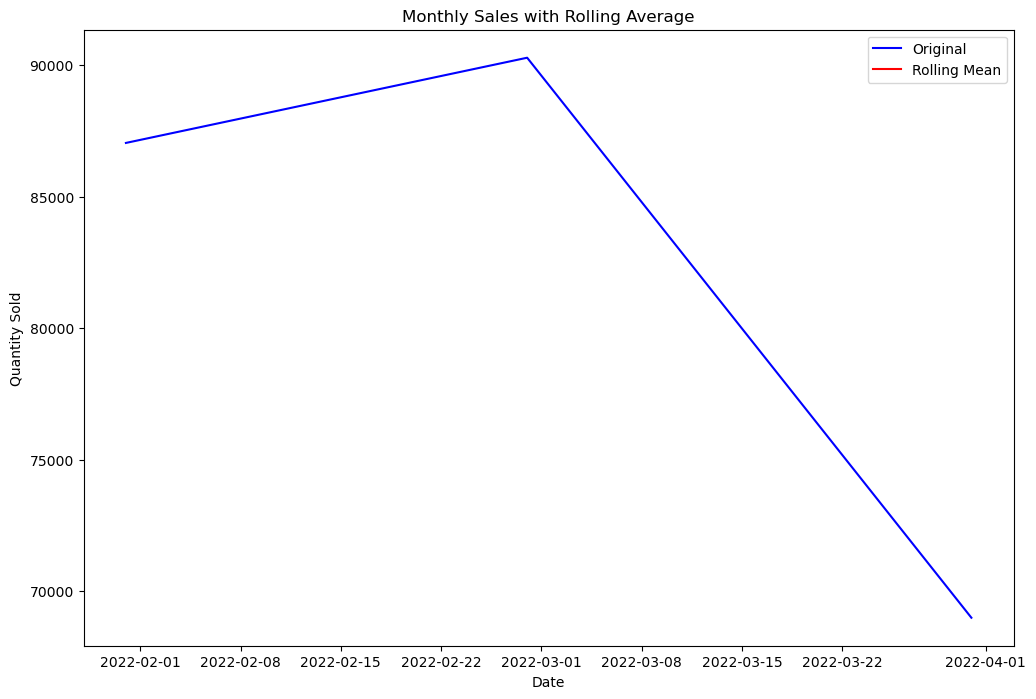

In [79]:
# Calculate the rolling average
window = 12  # You can adjust the window size as needed
monthly_sales['rolling_mean'] = monthly_sales['item_qty'].rolling(window=window).mean()

# Plot the original data and rolling average
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales['item_qty'], label='Original', color='blue')
plt.plot(monthly_sales['rolling_mean'], label='Rolling Mean', color='red')
plt.legend()
plt.title('Monthly Sales with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()
